#**Example 9.3.1**

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy.matlib as matlib
import math
from scipy.optimize import minimize
from google.colab import drive
drive.mount('/content/gdrive')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator




Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#define function f(x)
def beale(X,Y):
    a=1.5
    b=2.25
    c=2.2625
    f = (a-X+X*Y)**2  + (b-X+X*Y**2)**2 + (c-X+X*Y**3)**2
    dx= 2*(a-X+X*Y)*(-1+Y) + 2*(b-X+X*Y**2)*(-1+Y**2) +  2*(c-X+X*Y**3)*(-1+Y**3)
    dy= 2*(a-X+X*Y)*X      + 4*(b-X+X*Y**2)*X*Y       +  6*(c-X+X*Y**3)*(X*Y**2)
    dxx=2*(-1+Y)**2        + 2*(-1+Y**2)**2           +  2*(-1+Y**3)**2
    dyy=2*X**2             + 2*(a-X+X*Y)              +  8*X**2*Y**2       +  4*(b-X+X*Y**2)*X  +  18*Y**4*X**2        +  12*(c-X-X*Y**3)*X*Y
    dxy=2*X*(-1+Y)         + 2*(a-X+X*Y)              +  4*X*Y*(-1+Y**2)   +  4*(b-X+X*Y**2)*Y  +  6*X*Y**2*(-1+Y**3)  +  6*(c-X+X*Y**3)*Y**2
    H=np.array([[dxx,dxy],[dxy,dyy]])
    return f, dx, dy, H


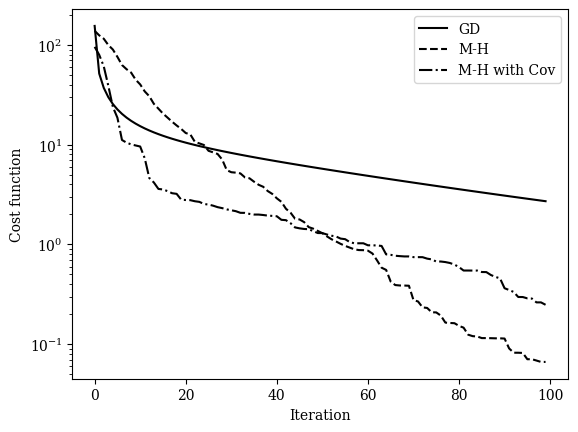

In [ ]:


count_M=np.array([],dtype=int)
count_M2=np.array([],dtype=int)

T=100 #Number of iterations in a trial
N=100 #Number of trials
w_init=np.array([1.2,2]).reshape(1,2)
zz_S=np.zeros((T,N))
zz_A=np.zeros((T,N))
zz_M=np.zeros((T,N))
zz_M2=np.zeros((T,N))

W_S=np.array([0,0]).reshape(1,2)
W_A=np.array([0,0]).reshape(1,2)
W_M=np.array([0,0]).reshape(1,2)
W_M2=np.array([0,0]).reshape(1,2)

for j in np.arange(N):
  ####Gradient descent
  w_S=w_init
  w_A=w_init
  w_M=w_init
  w_M2=w_init

  mu=0.001
  # Gradient descent
  for i in np.arange(T):
    z,dx,dy,H2=beale(w_S[0,0],w_S[0,1]) #Value of the cost function and its gradient
    W_S=np.append(W_S,w_S,axis=0)
    w_S=w_S-mu*np.array([dx,dy]) # Gradient descent
    zz_S[i,j]=z


####Metropolis-Hastings
  for i in np.arange(T):
    z,dx,dy,H2=beale(w_M[0,0],w_M[0,1]) #Value of the cost function and its gradient
    W_M=np.append(W_M,w_M,axis=0)
    w_M_h=w_M+0.3*np.random.randn(2)
    z_h,dx,dy,H2=beale(w_M_h[0,0],w_M_h[0,1]) #Value of the cost function and its gradient
    r=np.min([1,z_h/z])
    p=np.random.rand()
    if (p>=r):
      w_M=w_M_h
      z=z_h
    zz_M[i,j]=z
  if (np.linalg.norm(w_M-[2.3,-0.3])<1):
    count_M=np.append(count_M,j)
####Metropolis Hastings with H
  for i in np.arange(T):
   z,dx,dy,H=beale(w_M2[0,0],w_M2[0,1]) #Value of the cost function and its gradient
   W_M2=np.append(W_M2,w_M2,axis=0)
   L,Q=LA.eig(H)
   F=Q@np.diag(np.sqrt(abs(L)))
   w_M2_h=w_M2+0.1*np.random.randn(2)@F
   z_h,dx,dy,H=beale(w_M2_h[0,0],w_M2_h[0,1]) #Value of the cost function and its gradient
   r=np.min([1,z_h/z])
   p=np.random.rand()
   if (p>=r):
     w_M2=w_M2_h
     z=z_h
   zz_M2[i,j]=z
  if (np.linalg.norm(w_M2-[2.3,-0.3])<1):
   count_M2=np.append(count_M2,j)

ax=plt.semilogy(np.mean(zz_S,1),color='black', linestyle='solid',label='GD')
ax=plt.semilogy(np.mean(zz_M[:,count_M],1),color='black', linestyle='dashed', label='M-H')
ax=plt.semilogy(np.mean(zz_M2[:,count_M2],1),color='black',linestyle='dashdot', label='M-H with Cov')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Cost function')
plt.savefig('/content/gdrive/My Drive/example_9.1.pdf')
plt.show()
